<a href="https://colab.research.google.com/github/Katharina-github/SalesDataAnalysis/blob/main/generate_synthetic_sales_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.4 MB/s eta 0:00:00


In [38]:
import pandas as pd
import numpy as np
from faker import Faker
import random
from datetime import datetime, timedelta, date

# Initialize Faker
fake = Faker()

# Define time range
date_start = datetime(2024, 1, 1)
date_end = datetime(2024, 12, 31)

# Generate only dates (without time)
date_range = pd.date_range(date_start, date_end, freq='D').date

annual_growth_rate = 0.10  # 10% annual growth
daily_growth_rate = (1 + annual_growth_rate) ** (1/365) - 1  # Convert to daily growth
trend_factor = 1.0  # Initial trend factor

# Define regions and their sales volume
regions_volume = {
    "Spain": "normal",
    "Italy": "normal",
    "Germany": "high",
    "Netherlands": "high",
    "UK": "low",
    "Ireland": "low"
}

# Define base sales ranges for each sales volume
base_sales_ranges = {
    "low": (10, 20),
    "normal": (20, 50),
    "high": (35, 80)
}

# Define categories and realistic product names
categories = {
    "Seeds": ["Tomato Seeds", "Basil Seeds", "Sunflower Seeds", "Carrot Seeds"],
    "Soil & Fertilizers": ["Organic Compost", "Potting Soil", "Nitrogen Fertilizer", "Mulch"],
    "Gardening Tools": ["Hand Trowel", "Pruning Shears", "Garden Hoe", "Rake"],
    "Outdoor Furniture": ["Garden Bench", "Patio Table", "Lounge Chair", "Swing Seat"],
    "Watering Systems": ["Drip Irrigation Kit", "Sprinkler System", "Watering Can", "Garden Hose"],
    "Pest Control": ["Slug Repellent", "Insect Netting", "Neem Oil Spray", "Ant Killer"],
    "Bulbs": ["Tulip Bulbs", "Daffodil Bulbs", "Lily Bulbs", "Hyacinth Bulbs"],
    "Compost": ["Peat-Free Compost", "Worm Castings", "Leaf Mold", "Manure Compost"],
    "Rakes": ["Leaf Rake", "Garden Rake", "Thatch Rake", "Lawn Rake"],
    "Indoor Plants": ["Snake Plant", "Spider Plant", "Peace Lily", "Aloe Vera"],
    "Pots & Planters": ["Terracotta Pot", "Hanging Basket", "Raised Garden Bed", "Self-Watering Pot"],
    "Decorative Gardening Items": ["Garden Gnome", "Solar Lanterns", "Trellis Arch", "Bird Bath"]
}

# Define realistic price ranges and profit margins per category
price_ranges = {
    "Seeds": (1, 5),  # High margin
    "Soil & Fertilizers": (5, 30),  # Low margin
    "Gardening Tools": (10, 50),  # Medium margin
    "Outdoor Furniture": (50, 500),  # Medium margin
    "Watering Systems": (10, 100),  # Medium margin
    "Pest Control": (5, 40),  # High margin
    "Bulbs": (2, 10),  # High margin
    "Compost": (5, 20),  # Low margin
    "Rakes": (15, 60),  # Medium margin
    "Indoor Plants": (10, 50),  # High margin
    "Pots & Planters": (5, 50),  # Medium margin
    "Decorative Gardening Items": (10, 100)  # High margin
}

# Define profit margins per category
profit_margins = {
    "Seeds": 0.4,  # 40% margin
    "Soil & Fertilizers": 0.2,  # 20% margin
    "Gardening Tools": 0.3,  # 30% margin
    "Outdoor Furniture": 0.25,  # 25% margin
    "Watering Systems": 0.3,  # 30% margin
    "Pest Control": 0.35,  # 35% margin
    "Bulbs": 0.4,  # 40% margin
    "Compost": 0.2,  # 20% margin
    "Rakes": 0.3,  # 30% margin
    "Indoor Plants": 0.4,  # 40% margin
    "Pots & Planters": 0.3,  # 30% margin
    "Decorative Gardening Items": 0.5  # 50% margin
}

# Generate Products Table
products = []
product_id = 1
for category, names in categories.items():
    for name in names:
        cost_price = round(random.uniform(price_ranges[category][0], price_ranges[category][1]), 2)
        selling_price = round(cost_price * (1 + profit_margins[category]), 2)  # Ensure selling price > cost price
        products.append([product_id, name, category, cost_price, selling_price, random.randint(1, 10)])  # Popularity
        product_id += 1
products_df = pd.DataFrame(products, columns=["ProductID", "ProductName", "Category", "CostPrice", "SellingPrice", "Popularity"])

# Function to generate buying frequency based on loyalty score
def get_buying_frequency(loyalty_score, segment):
    if segment == 'Retail':
        # Higher loyalty score increases the chance of higher buying frequency
        weights = [1 / (i + 1) for i in range(10)]  # Weights decrease as frequency increases
        weights = [w * (loyalty_score / 10) for w in weights]  # Scale weights by loyalty score
        buying_frequency = random.choices(range(1, 11), weights=weights, k=1)[0]
    else:
        # Wholesale customers have lower buying frequency
        weights = [1 / (i + 1) for i in range(5)]  # Weights decrease as frequency increases
        weights = [w * (loyalty_score / 10) for w in weights]  # Scale weights by loyalty score
        buying_frequency = random.choices(range(1, 6), weights=weights, k=1)[0]
    return buying_frequency

# Generate Customers Table
regions = ["Spain", "Italy", "Germany", "Netherlands", "UK", "Ireland"]
region_weights = [0.3, 0.25, 0.2, 0.15, 0.07, 0.03]  # Higher chance for Germany & Netherlands, lower for UK & Ireland
customers = pd.DataFrame({
    'CustomerID': range(1, 5001),
    'CustomerName': [fake.name() for _ in range(5000)],
    'Region': random.choices(regions, weights=region_weights, k=5000),
    'Segment': random.choices(['Retail', 'Wholesale'], weights=[0.85, 0.15], k=5000),
    'LoyaltyScore': [random.randint(1, 10) for _ in range(5000)],
    'Age': [random.randint(20, 70) for _ in range(5000)],
    'Gender': random.choices(['Male', 'Female'], k=5000),
    'JoinDate': [fake.date_between(start_date=date(2020, 1, 1), end_date=date(2024, 12, 31)) for _ in range(5000)],
    'Email': [fake.email() for _ in range(5000)],
    'PhoneNumber': [fake.phone_number() for _ in range(5000)],
    'BuyingFrequency': [get_buying_frequency(score, segment) for score, segment in zip(
        [random.randint(1, 10) for _ in range(5000)],  # LoyaltyScore
        random.choices(['Retail', 'Wholesale'], weights=[0.85, 0.15], k=5000)  # Segment
    )]
})

# Generate Campaigns
campaigns = []
for campaign_id in range(1, 11):
    campaign = {
        'CampaignID': campaign_id,
        'CampaignName': fake.catch_phrase(),
        'StartDate': fake.date_between(start_date=date(2023, 12, 2), end_date=date(2024, 12, 1)),
        'Region': random.choice(regions),
        'Budget': round(random.uniform(5000, 50000), 2)
    }
    campaign['EndDate'] = campaign['StartDate'] + timedelta(days=random.randint(30, 180))
    # Adjust impact calculation based on budget
    budget = campaign['Budget']

    # Higher budget increases the probability of a higher impact
    if budget > 40000:  # High budget campaigns
        impact = random.uniform(1.2, 1.5)  # Higher impact range
    elif budget > 20000:  # Medium budget campaigns
        impact = random.uniform(1.1, 1.3)  # Medium impact range
    else:  # Low budget campaigns
        impact = random.uniform(1.05, 1.15)  # Lower impact range

    # Cap the impact at 1.5
    campaign['Impact'] = min(impact, 1.5)

    # Append the campaign to the campaigns list
    campaigns.append(campaign)

# Convert the list of campaigns to a DataFrame
campaigns_df = pd.DataFrame(campaigns)


# Define region-specific seasonality factors
seasonality_countries = {
    "Spain": {1: 0.6, 2: 0.7, 3: 0.9, 4: 1.2, 5: 1.5, 6: 1.6, 7: 1.5, 8: 1.4, 9: 1.3, 10: 1.1, 11: 0.8, 12: 0.7},
    "Italy": {1: 0.6, 2: 0.7, 3: 0.9, 4: 1.2, 5: 1.5, 6: 1.6, 7: 1.5, 8: 1.4, 9: 1.3, 10: 1.1, 11: 0.8, 12: 0.7},
    "Germany": {1: 0.4, 2: 0.5, 3: 0.8, 4: 1.3, 5: 1.7, 6: 1.8, 7: 1.5, 8: 1.3, 9: 1.0, 10: 0.8, 11: 0.5, 12: 0.4},
    "Netherlands": {1: 0.4, 2: 0.5, 3: 0.8, 4: 1.3, 5: 1.7, 6: 1.8, 7: 1.5, 8: 1.3, 9: 1.0, 10: 0.8, 11: 0.5, 12: 0.4},
    "UK": {1: 0.5, 2: 0.6, 3: 0.9, 4: 1.3, 5: 1.6, 6: 1.7, 7: 1.5, 8: 1.3, 9: 1.1, 10: 0.9, 11: 0.6, 12: 0.5},
    "Ireland": {1: 0.5, 2: 0.6, 3: 0.9, 4: 1.3, 5: 1.6, 6: 1.7, 7: 1.5, 8: 1.3, 9: 1.1, 10: 0.9, 11: 0.6, 12: 0.5}
}

seasonality_categories = {
    "Seeds": {1: 0.7, 2: 0.9, 3: 1.4, 4: 1.5, 5: 1.4, 6: 1.2, 7: 1.0, 8: 0.9, 9: 0.8, 10: 0.7, 11: 0.7, 12: 0.7},
    "Soil & Fertilizers": {1: 0.8, 2: 1.0, 3: 1.4, 4: 1.5, 5: 1.3, 6: 1.0, 7: 0.9, 8: 0.8, 9: 0.7, 10: 0.7, 11: 0.7, 12: 0.7},
    "Gardening Tools": {1: 0.6, 2: 0.8, 3: 1.2, 4: 1.3, 5: 1.4, 6: 1.5, 7: 1.3, 8: 1.2, 9: 1.0, 10: 0.9, 11: 0.7, 12: 0.6},
    "Outdoor Furniture": {1: 0.5, 2: 0.6, 3: 0.8, 4: 1.1, 5: 1.2, 6: 1.3, 7: 1.4, 8: 1.4, 9: 1.1, 10: 0.9, 11: 0.7, 12: 0.6},
    "Watering Systems": {1: 0.5, 2: 0.7, 3: 1.0, 4: 1.2, 5: 1.4, 6: 1.6, 7: 1.7, 8: 1.6, 9: 1.4, 10: 1.0, 11: 0.8, 12: 0.6},
    "Pest Control": {1: 0.4, 2: 0.6, 3: 1.0, 4: 1.3, 5: 1.5, 6: 1.6, 7: 1.5, 8: 1.4, 9: 1.2, 10: 1.0, 11: 0.7, 12: 0.5},
    "Bulbs": {1: 0.6, 2: 0.8, 3: 1.2, 4: 1.3, 5: 1.1, 6: 0.9, 7: 0.8, 8: 0.7, 9: 1.1, 10: 1.4, 11: 1.5, 12: 1.3},
    "Compost": {1: 0.7, 2: 0.8, 3: 1.0, 4: 1.2, 5: 1.3, 6: 1.1, 7: 1.0, 8: 0.9, 9: 1.4, 10: 1.5, 11: 1.4, 12: 1.0},
    "Rakes": {1: 0.5, 2: 0.6, 3: 0.8, 4: 1.0, 5: 1.1, 6: 1.2, 7: 1.1, 8: 1.0, 9: 1.4, 10: 1.6, 11: 1.5, 12: 1.2},
    "Indoor Plants": {1: 1.1, 2: 1.1, 3: 1.0, 4: 1.0, 5: 1.2, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.1, 11: 1.2, 12: 1.4},
    "Pots & Planters": {1: 0.6, 2: 0.8, 3: 1.1, 4: 1.3, 5: 1.5, 6: 1.4, 7: 1.3, 8: 1.2, 9: 1.0, 10: 0.9, 11: 0.7, 12: 0.6},
    "Decorative Gardening Items": {1: 1.1, 2: 1.1, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.1, 11: 1.2, 12: 1.3}
}

# Customer preference function
def get_customer_preference(age, category):
    if age >= 50 and category in ["Gardening Tools", "Outdoor Furniture", "Bulbs"]:
        return 1.5  # Older customers prefer traditional items
    elif age <= 35 and category in ["Indoor Plants", "Decorative Gardening Items"]:
        return 1.5  # Younger customers prefer trendy items
    else:
        return 1.0

# Function to select a product based on seasonality and customer preferences
def select_product(this_date, age, products_df, seasonality_categories):
    month = this_date.month
    category_weights = {}
    for category, factors in seasonality_categories.items():
        seasonality_weight = factors[month]
        preference_weight = get_customer_preference(age, category)
        category_weights[category] = seasonality_weight * preference_weight
    total_weight = sum(category_weights.values())
    category_weights = {k: v / total_weight for k, v in category_weights.items()}
    selected_category = random.choices(list(category_weights.keys()), weights=list(category_weights.values()), k=1)[0]
    category_products = products_df[products_df['Category'] == selected_category]
    # Reset index to avoid KeyError
    category_products = category_products.reset_index(drop=True)
    product_id = random.choices(category_products['ProductID'], weights=category_products['Popularity'], k=1)[0]
    return product_id

# Function to calculate discount
def get_discount(quantity, loyalty_score):
    base_discount = min(0.25, 0.05 * (quantity // 10) + 0.02 * loyalty_score)
    return round(base_discount, 2)


# Generate Inventory Table
inventory = []
for product_id in products_df['ProductID']:
    category = products_df.loc[products_df['ProductID'] == product_id, 'Category'].values[0]
    popularity = products_df.loc[products_df['ProductID'] == product_id, 'Popularity'].values[0]
    stock_level = random.randint(20, 500) * (popularity / 10)  # Higher stock for popular items
    reorder_point = random.randint(10, 50)
    inventory.append([product_id, stock_level, reorder_point])
inventory_df = pd.DataFrame(inventory, columns=["ProductID", "StockLevel", "ReorderPoint"])

# Generate sales data
sales = []
not_realized_purchases = []
sale_id = 0

for date in date_range:
    for region, volume in regions_volume.items():
        base_sales = random.randint(base_sales_ranges[volume][0], base_sales_ranges[volume][1])
        seasonality = seasonality_countries[region][date.month]
        campaign_factor = 1.0
        for campaign in campaigns:
            start_date = campaign['StartDate']
            end_date = campaign['EndDate']
            if campaign['Region'] == region and start_date <= date <= end_date:
                campaign_factor *= campaign['Impact']
        adjusted_sales = int(base_sales * seasonality * campaign_factor * trend_factor)
        if date.weekday() >= 5:  # Weekend multiplier
            adjusted_sales = int(adjusted_sales * 1.3)
        adjusted_sales += random.randint(-5, 10)

        for _ in range(adjusted_sales):
            region_customers = customers[customers['Region'] == region]
            # Filter customers by region and JoinDate
            region_customers = customers[(customers['Region'] == region) & (customers['JoinDate'] <= date)]
            customer = region_customers.sample(1, weights=region_customers['BuyingFrequency'] / region_customers['BuyingFrequency'].sum()).iloc[0]
            customer_id = customer['CustomerID']
            segment = customer['Segment']
            age = customer['Age']
            # Determine product
            product_id = select_product(date, age, products_df, seasonality_categories)
            category = products_df.loc[products_df['ProductID'] == product_id, 'Category'].values[0]
            loyalty_score = customer['LoyaltyScore']
            selling_price = products_df.loc[products_df['ProductID'] == product_id, 'SellingPrice'].values[0]

            # Determine quantity
            # Determine price range
            if selling_price <= 20:
                price_range = 'Low'
            elif selling_price <= 199:
                price_range = 'Mid'
            else:
                price_range = 'High'

            # Adjust quantity based on price range and customer segment
            if segment == 'Wholesale':
                if price_range == 'Low':
                    quantity = random.randint(5, 50)  # Higher quantities for low-priced items
                elif price_range == 'Mid':
                    quantity = random.randint(2, 20)  # Moderate quantities for mid-priced items
                else:
                    quantity = random.randint(1, 5)  # Smaller quantities for high-priced items
            else:  # Retail customers
                if price_range == 'Low':
                    quantity = random.choice([1, 2, 3, 4, 5])  # Higher quantities for low-priced items
                elif price_range == 'Mid':
                    quantity = random.choice([1, 1, 2, 2, 3])  # Moderate quantities for mid-priced items
                else:
                    quantity = 1  # Smaller quantities for high-priced items

            discount_rate = get_discount(quantity, loyalty_score)
            discount_amount = round(quantity * selling_price * discount_rate, 2)
            sales_amount = round((quantity * selling_price) - discount_amount, 2)
            payment_method = random.choice(['Credit Card', 'PayPal', 'Bank Transfer'])
            shipping_cost = round(random.uniform(5, 50), 2)

            stock_level = inventory_df.loc[inventory_df['ProductID'] == product_id, 'StockLevel'].values[0]
            if stock_level >= quantity:
                inventory_df.loc[inventory_df['ProductID'] == product_id, 'StockLevel'] -= quantity
                sales.append([sale_id, date, product_id, customer_id, region, sales_amount, selling_price, discount_rate, discount_amount, quantity, payment_method, shipping_cost])
                customers.loc[customers['CustomerID'] == customer_id, 'LoyaltyScore'] += 1
                sale_id += 1
            else:
                not_realized_purchases.append([sale_id, date, product_id, customer_id, region, sales_amount, selling_price, discount_rate, discount_amount, quantity, payment_method, shipping_cost])

    # Update trend_factor for the next day
    trend_factor *= (1 + daily_growth_rate)

    # Restock inventory at the end of the day
    for index, row in inventory_df.iterrows():
        if row['StockLevel'] <= row['ReorderPoint']:
            inventory_df.at[index, 'StockLevel'] += random.randint(50, 200)

# Create DataFrames
sales_df = pd.DataFrame(sales, columns=["SaleID", "SalesDate", "ProductID", "CustomerID", "Region", "SalesAmount", "Price", "DiscountRate", "DiscountAmount", "Quantity", "PaymentMethod", "ShippingCost"])
not_realized_purchases_df = pd.DataFrame(not_realized_purchases, columns=["SaleID", "SalesDate", "ProductID", "CustomerID", "Region", "SalesAmount", "Price", "DiscountRate", "DiscountAmount", "Quantity", "PaymentMethod", "ShippingCost"])

# Generate returns
def get_return_rate(category, price):
    base_rate = 0.1  # Default return rate
    if category in ["Indoor Plants"]:
        base_rate = 0.2  # 20% return rate for fragile items
    elif category in ["Outdoor Furniture"]:
        base_rate = 0.15  # 15% return rate for expensive items
    elif category in ["Seeds", "Soil & Fertilizers"]:
        base_rate = 0.05  # 5% return rate for low-cost items

    # Adjust return rate based on price
    if price > 100:  # Expensive items have a higher return rate
        base_rate += 0.05
    elif price < 20:  # Cheap items have a lower return rate
        base_rate -= 0.03

    return max(0, min(base_rate, 1))  # Ensure the rate is between 0 and 1

def generate_return_date(sale_date):
    # Generate a return date within 7 to 30 days after the sale date
    return_date = sale_date + timedelta(days=random.randint(7, 30))
    return return_date

def get_return_reason(category):
    reason_weights = {
        "Indoor Plants": {'Defective': 4, 'Damaged during shipping': 3, 'Customer Changed Mind': 2},
        "Outdoor Furniture": {'Defective': 3, 'Did not meet expectations': 4, 'Wrong Item': 2},
        "Seeds": {'Product expired': 5, 'Wrong Item': 3, 'Customer Changed Mind': 1},
        "Soil & Fertilizers": {'Product expired': 4, 'Wrong Item': 3, 'Customer Changed Mind': 2},
        "Other": {'Defective': 3, 'Wrong Item': 2, 'Customer Changed Mind': 2, 'Late Delivery': 3}
    }
    reasons, weights = zip(*reason_weights.get(category, reason_weights["Other"]).items())
    return random.choices(reasons, weights=weights, k=1)[0]

# Define the cutoff date for returns
CUTOFF_DATE = datetime(2024, 12, 31)

returns = []
for return_id in range(1, 50001):
    sale_id = random.choice(sales_df['SaleID'].tolist())
    product_id = sales_df.loc[sales_df['SaleID'] == sale_id, 'ProductID'].values[0]
    category = products_df.loc[products_df['ProductID'] == product_id, 'Category'].values[0]
    sale_date = sales_df.loc[sales_df['SaleID'] == sale_id, 'SalesDate'].values[0]
    price = sales_df.loc[sales_df['SaleID'] == sale_id, 'Price'].values[0]

    # If you need a datetime object, use datetime.combine
    sale_date = datetime.combine(sale_date, datetime.min.time())

    # Get the return probability for the category
    return_probability = get_return_rate(category, price)

    # Use random.choices with weights to decide if the item is returned
    is_returned = random.choices([True, False], weights=[return_probability, 1 - return_probability], k=1)[0]

    if is_returned:
        return_date = generate_return_date(sale_date)

        # Check if the return date is before the cutoff date (31.12.2024)
        if return_date <= CUTOFF_DATE:
            reason = get_return_reason(category)
            returns.append([return_id, sale_id, return_date.strftime("%Y-%m-%d"), reason])

# Create DataFrame
returns_df = pd.DataFrame(returns, columns=["ReturnID", "SaleID", "ReturnDate", "Reason"])


# Save to CSV
products_df.to_csv('products.csv', index=False)
customers.to_csv('customers.csv', index=False)
sales_df.to_csv('sales.csv', index=False)
returns_df.to_csv('returns.csv', index=False)
campaigns_df.to_csv('campaigns.csv', index=False)
inventory_df.to_csv('inventory.csv', index=False)
not_realized_purchases_df.to_csv('not_realized_purchases.csv', index=False)

# **Data check**

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
#def check_data_quality(products_df, customers_df, sales_df, returns_df, campaigns_df):
def check_data_quality(products_df, customers_df, sales_df, campaigns_df):
    results = {}

    # Check for duplicates
    results['duplicates'] = {
        'products': products_df.duplicated().sum(),
        'customers': customers_df.duplicated().sum(),
        'sales': sales_df.duplicated().sum(),
        #'returns': returns_df.duplicated().sum(),
        'campaigns': campaigns_df.duplicated().sum()
    }

    # Check for missing values
    results['missing_values'] = {
        'products': products_df.isnull().sum().to_dict(),
        'customers': customers_df.isnull().sum().to_dict(),
        'sales': sales_df.isnull().sum().to_dict(),
        #'returns': returns_df.isnull().sum().to_dict(),
        'campaigns': campaigns_df.isnull().sum().to_dict()
    }

    # Check for invalid sales (Negative values)
    results['invalid_sales'] = sales_df[(sales_df['SalesAmount'] < 0) | (sales_df['Price'] < 0)].shape[0]

    # Check if ProductID exists in products_df
    results['invalid_product_ids'] = sales_df[~sales_df['ProductID'].isin(products_df['ProductID'])].shape[0]

    # Check if CustomerID exists in customers_df
    results['invalid_customer_ids'] = sales_df[~sales_df['CustomerID'].isin(customers_df['CustomerID'])].shape[0]

    # Ensure discounts are within logical range (0 - 0.25 as per business rules)
    results['invalid_discounts'] = sales_df[(sales_df['DiscountRate'] < 0) | (sales_df['DiscountRate'] > 0.25)].shape[0]

    # Check for unrealistic quantities
    results['unrealistic_quantities'] = sales_df[sales_df['Quantity'] <= 0].shape[0]

    # Ensure Return SaleIDs exist in sales
    #results['invalid_return_sale_ids'] = returns_df[~returns_df['SaleID'].isin(sales_df['SaleID'])].shape[0]

    # Ensure campaign end date is after start date
    results['invalid_campaign_dates'] = campaigns_df[campaigns_df['EndDate'] < campaigns_df['StartDate']].shape[0]

    return results

# Example usage:
#data_quality_results = check_data_quality(products_df, customers, sales_df, returns_df, campaigns_df)
data_quality_results = check_data_quality(products_df, customers, sales_df, campaigns_df)
print(data_quality_results)

{'duplicates': {'products': 0, 'customers': 0, 'sales': 0, 'campaigns': 0}, 'missing_values': {'products': {'ProductID': 0, 'ProductName': 0, 'Category': 0, 'CostPrice': 0, 'SellingPrice': 0, 'Popularity': 0}, 'customers': {'CustomerID': 0, 'CustomerName': 0, 'Region': 0, 'Segment': 0, 'LoyaltyScore': 0, 'Age': 0, 'Gender': 0, 'JoinDate': 0, 'Email': 0, 'PhoneNumber': 0, 'BuyingFrequency': 0}, 'sales': {'SaleID': 0, 'SalesDate': 0, 'ProductID': 0, 'CustomerID': 0, 'Region': 0, 'SalesAmount': 0, 'Price': 0, 'DiscountRate': 0, 'DiscountAmount': 0, 'Quantity': 0, 'PaymentMethod': 0, 'ShippingCost': 0}, 'campaigns': {'CampaignID': 0, 'CampaignName': 0, 'StartDate': 0, 'Region': 0, 'Budget': 0, 'EndDate': 0, 'Impact': 0}}, 'invalid_sales': 0, 'invalid_product_ids': 0, 'invalid_customer_ids': 0, 'invalid_discounts': 0, 'unrealistic_quantities': 0, 'invalid_campaign_dates': 0}


In [41]:
sales_df.head()

,SaleID,SalesDate,ProductID,CustomerID,Region,SalesAmount,Price,DiscountRate,DiscountAmount,Quantity,PaymentMethod,ShippingCost
0,0,2024-01-01,47,41,Spain,42.46,25.89,0.18,9.32,2,Bank Transfer,18.45
1,1,2024-01-01,32,2758,Spain,40.29,11.99,0.16,7.67,4,Bank Transfer,32.93
2,2,2024-01-01,13,2191,Spain,164.67,171.53,0.04,6.86,1,Bank Transfer,37.66
3,3,2024-01-01,45,888,Spain,789.39,125.30,0.10,87.71,7,Credit Card,17.48
4,4,2024-01-01,8,1570,Spain,30.37,33.74,0.10,3.37,1,Bank Transfer,48.89


In [42]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105342 entries, 0 to 105341
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SaleID          105342 non-null  int64  
 1   SalesDate       105342 non-null  object 
 2   ProductID       105342 non-null  int64  
 3   CustomerID      105342 non-null  int64  
 4   Region          105342 non-null  object 
 5   SalesAmount     105342 non-null  float64
 6   Price           105342 non-null  float64
 7   DiscountRate    105342 non-null  float64
 8   DiscountAmount  105342 non-null  float64
 9   Quantity        105342 non-null  int64  
 10  PaymentMethod   105342 non-null  object 
 11  ShippingCost    105342 non-null  float64
dtypes: float64(5), int64(4), object(3)
memory usage: 9.6+ MB


In [43]:
sales_df.describe()

,SaleID,ProductID,CustomerID,SalesAmount,Price,DiscountRate,DiscountAmount,Quantity,ShippingCost
count,105342.000000,105342.000000,105342.000000,105342.000000,105342.000000,105342.000000,105342.000000,105342.000000,105342.000000
mean,52670.500000,24.764491,2494.189848,133.443865,67.872279,0.224841,39.830574,4.108067,27.513855
std,30409.760366,13.777815,1440.271746,236.081573,122.214673,0.050754,73.348642,6.523576,13.004442
min,0.000000,1.000000,1.000000,1.840000,2.450000,0.020000,0.050000,1.000000,5.000000
25%,26335.250000,13.000000,1251.000000,27.810000,15.960000,0.240000,7.700000,1.000000,16.260000
50%,52670.500000,24.000000,2479.000000,52.870000,31.550000,0.250000,15.060000,2.000000,27.490000
75%,79005.750000,37.000000,3750.000000,124.600000,55.380000,0.250000,37.250000,4.000000,38.800000
max,105341.000000,48.000000,5000.000000,3018.930000,593.230000,0.250000,857.650000,50.000000,50.000000


<Axes: title={'center': 'Sales Distribution by Month'}, xlabel='SalesDate'>

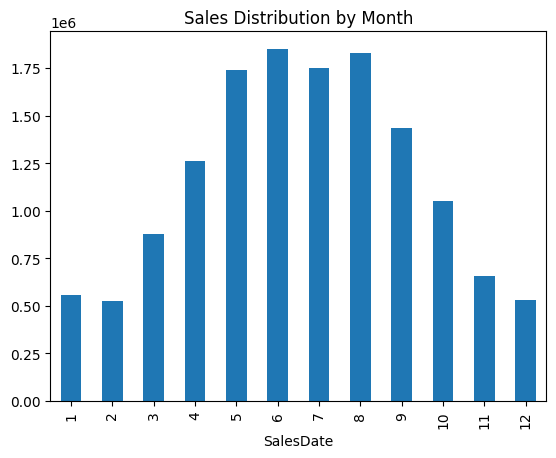

In [44]:
sales_df["SalesDate"] = pd.to_datetime(sales_df["SalesDate"])
sales_by_month = sales_df.groupby(sales_df["SalesDate"].dt.month)["SalesAmount"].sum()
sales_by_month.plot(kind="bar", title="Sales Distribution by Month")

<Axes: title={'center': 'Sales Distribution by Month'}, xlabel='SalesDate'>

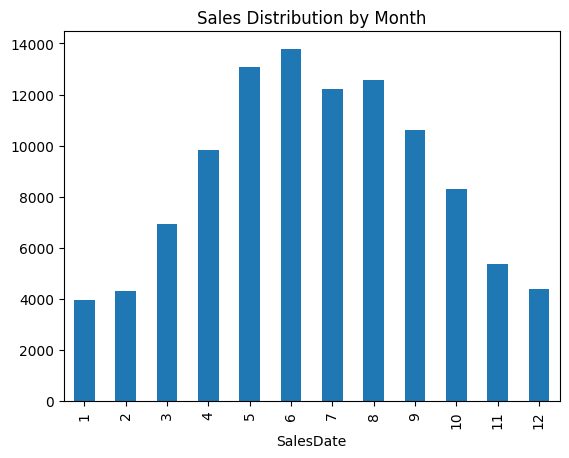

In [45]:
sales_df["SalesDate"] = pd.to_datetime(sales_df["SalesDate"])
sales_by_month = sales_df.groupby(sales_df["SalesDate"].dt.month)["SaleID"].count()
sales_by_month.plot(kind="bar", title="Sales Distribution by Month")

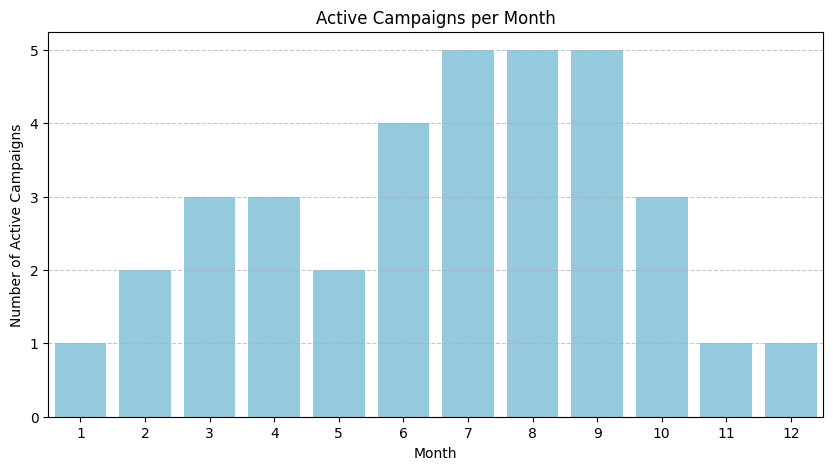

In [46]:
# Ensure StartDate and EndDate are in datetime format
campaigns_df['StartDate'] = pd.to_datetime(campaigns_df['StartDate'])
campaigns_df['EndDate'] = pd.to_datetime(campaigns_df['EndDate'])

# Generate a DataFrame to count active campaigns per month
months = np.arange(1, 13)  # Months from 1 to 12
active_campaigns = {month: 0 for month in months}

# Count campaigns active in each month
for _, row in campaigns_df.iterrows():
    start_month = row['StartDate'].month
    end_month = row['EndDate'].month
    for month in range(start_month, end_month + 1):
        active_campaigns[month] += 1

# Convert dictionary to DataFrame
active_campaigns_df = pd.DataFrame(list(active_campaigns.items()), columns=['Month', 'ActiveCampaigns'])

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=active_campaigns_df, x='Month', y='ActiveCampaigns', color='skyblue')

# Customize
plt.xticks(np.arange(12), labels=[f'{m}' for m in range(1, 13)])
plt.xlabel("Month")
plt.ylabel("Number of Active Campaigns")
plt.title("Active Campaigns per Month")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

In [47]:
campaigns_df.head(10)

,CampaignID,CampaignName,StartDate,Region,Budget,EndDate,Impact
0,1,Streamlined client-server workforce,2024-07-27,Italy,24401.57,2024-12-28,1.263542
1,2,Persevering multi-tasking adapter,2024-03-14,UK,33994.88,2024-04-23,1.160000
2,3,Streamlined transitional model,2024-06-06,Germany,12606.29,2024-09-07,1.108675
3,4,Innovative zero-defect moratorium,2024-06-20,Netherlands,47175.50,2024-10-28,1.302766
4,5,Self-enabling cohesive array,2024-08-08,Italy,45161.56,2024-09-27,1.464633
5,6,Virtual mission-critical forecast,2024-04-07,Netherlands,37439.02,2024-07-05,1.166437
6,7,Horizontal 24/7 projection,2024-01-16,Germany,20083.94,2024-07-03,1.102898
7,8,Pre-emptive mobile model,2024-02-14,Netherlands,25644.19,2024-03-18,1.274706
8,9,Multi-lateral needs-based complexity,2024-08-09,Ireland,38202.00,2024-10-16,1.117653
9,10,Visionary optimal Graphical User Interface,2023-12-11,Netherlands,15987.89,2024-06-03,1.081607


In [49]:
print(customers.head())
print(customers.info())
print(customers.describe())

   CustomerID      CustomerName       Region Segment  LoyaltyScore  Age  \
0           1  Michael Williams  Netherlands  Retail            16   27   
1           2  Jasmine Mitchell      Germany  Retail            33   64   
2           3    Maurice Thomas        Italy  Retail            40   66   
3           4     Tracey Turner        Spain  Retail            14   52   
4           5        Sean Stone           UK  Retail            19   70   

   Gender    JoinDate                        Email            PhoneNumber  \
0  Female  2021-09-01       kimberly21@example.org  +1-479-695-2565x79442   
1  Female  2020-10-16       lisagarner@example.org           765-608-9661   
2  Female  2023-05-09        patrick10@example.com           977-948-0656   
3  Female  2021-08-01  gonzalezvincent@example.net       533-294-2231x063   
4  Female  2022-01-31          karen92@example.org       643.858.1934x883   

   BuyingFrequency  
0                1  
1                3  
2                8  
3 

Text(0.5, 1.0, 'Loyalty Score Distribution')

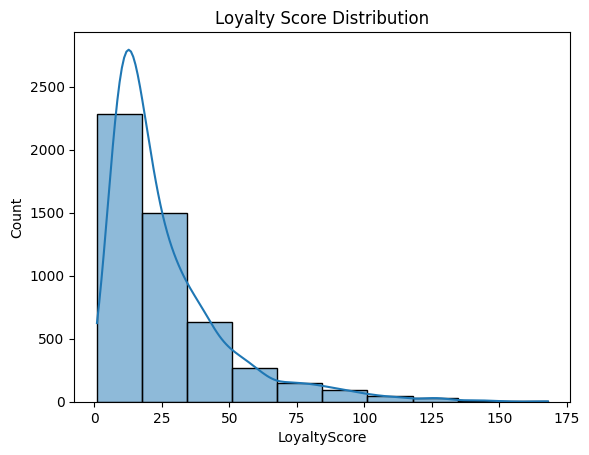

In [50]:
sns.histplot(customers["LoyaltyScore"], bins=10, kde=True).set_title("Loyalty Score Distribution")

In [51]:
# All purchases with high discount rate
# Merge sales_df with customers_df on CustomerID
sales_df = sales_df.merge(customers[['CustomerID', 'LoyaltyScore']], on='CustomerID', how='left')

high_discounts = sales_df[sales_df["DiscountRate"] > 0.2]
print(high_discounts.head(10))

     SaleID  SalesDate  ProductID  CustomerID   Region  SalesAmount  Price  \
30       30 2024-01-01          5        4787    Italy       442.78  17.89   
34       34 2024-01-01         43        4307    Italy       277.50  10.00   
62       62 2024-01-01          9        2227  Germany       615.11  40.98   
77       77 2024-01-01         10        2604  Germany       469.07  55.38   
137     137 2024-01-02          4         337    Spain       221.06   6.55   
140     140 2024-01-02         17        4481    Spain       695.20  80.00   
181     181 2024-01-02          1         277  Germany        67.64   5.49   
236     236 2024-01-03          4         351    Spain       219.03   6.55   
265     265 2024-01-03         39        3028    Italy        46.52  59.64   
283     283 2024-01-03         47        4362    Italy       310.68  25.89   

     DiscountRate  DiscountAmount  Quantity  PaymentMethod  ShippingCost  \
30           0.25          147.59        33         PayPal       

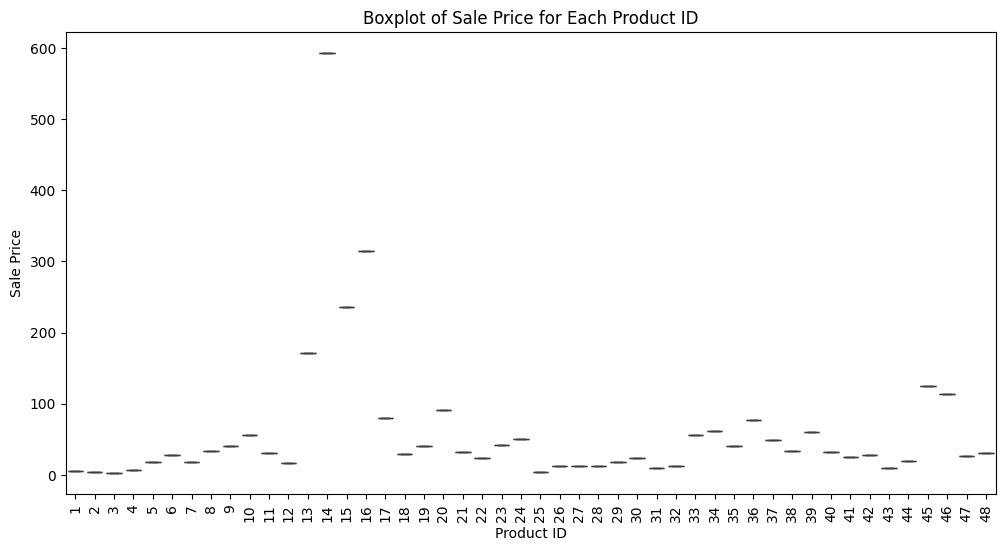

In [52]:
# Set figure size
plt.figure(figsize=(12, 6))

# Create boxplot
sns.boxplot(data=sales_df, x='ProductID', y='Price')

# Customize plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel("Product ID")
plt.ylabel("Sale Price")
plt.title("Boxplot of Sale Price for Each Product ID")

# Show plot
plt.show()

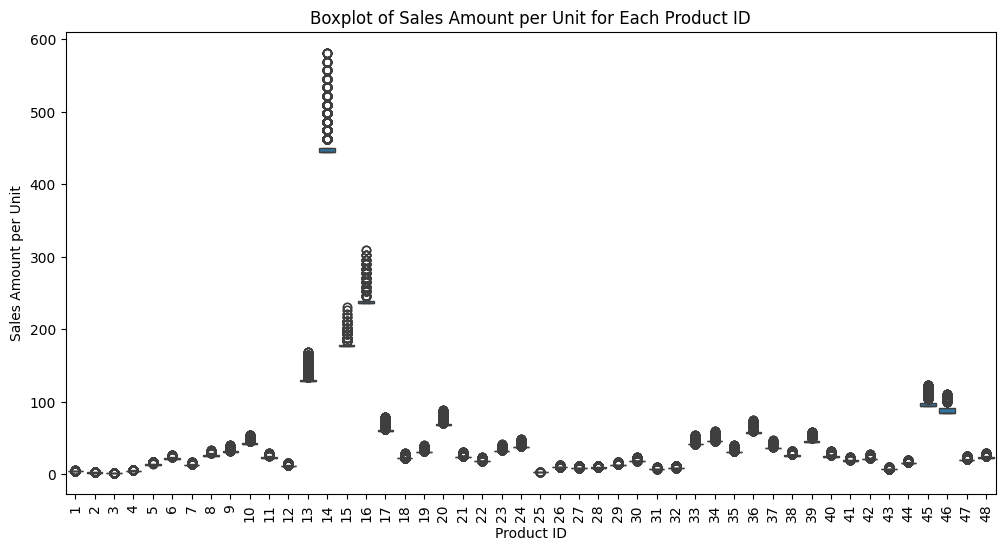

In [53]:
# Calculate SalesAmount per unit
sales_df['SalesAmount_per_Unit'] = sales_df['SalesAmount'] / sales_df['Quantity']

# Set figure size
plt.figure(figsize=(12, 6))

# Create boxplot
sns.boxplot(data=sales_df, x='ProductID', y='SalesAmount_per_Unit')

# Customize plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel("Product ID")
plt.ylabel("Sales Amount per Unit")
plt.title("Boxplot of Sales Amount per Unit for Each Product ID")

# Show plot
plt.show()

In [54]:
print(products_df.head())
print(products_df.info())
print(products_df.describe())

   ProductID      ProductName            Category  CostPrice  SellingPrice  \
0          1     Tomato Seeds               Seeds       3.92          5.49   
1          2      Basil Seeds               Seeds       2.35          3.29   
2          3  Sunflower Seeds               Seeds       1.75          2.45   
3          4     Carrot Seeds               Seeds       4.68          6.55   
4          5  Organic Compost  Soil & Fertilizers      14.91         17.89   

   Popularity  
0           3  
1           5  
2           5  
3           6  
4           9  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ProductID     48 non-null     int64  
 1   ProductName   48 non-null     object 
 2   Category      48 non-null     object 
 3   CostPrice     48 non-null     float64
 4   SellingPrice  48 non-null     float64
 5   Popularity    48 non-null  

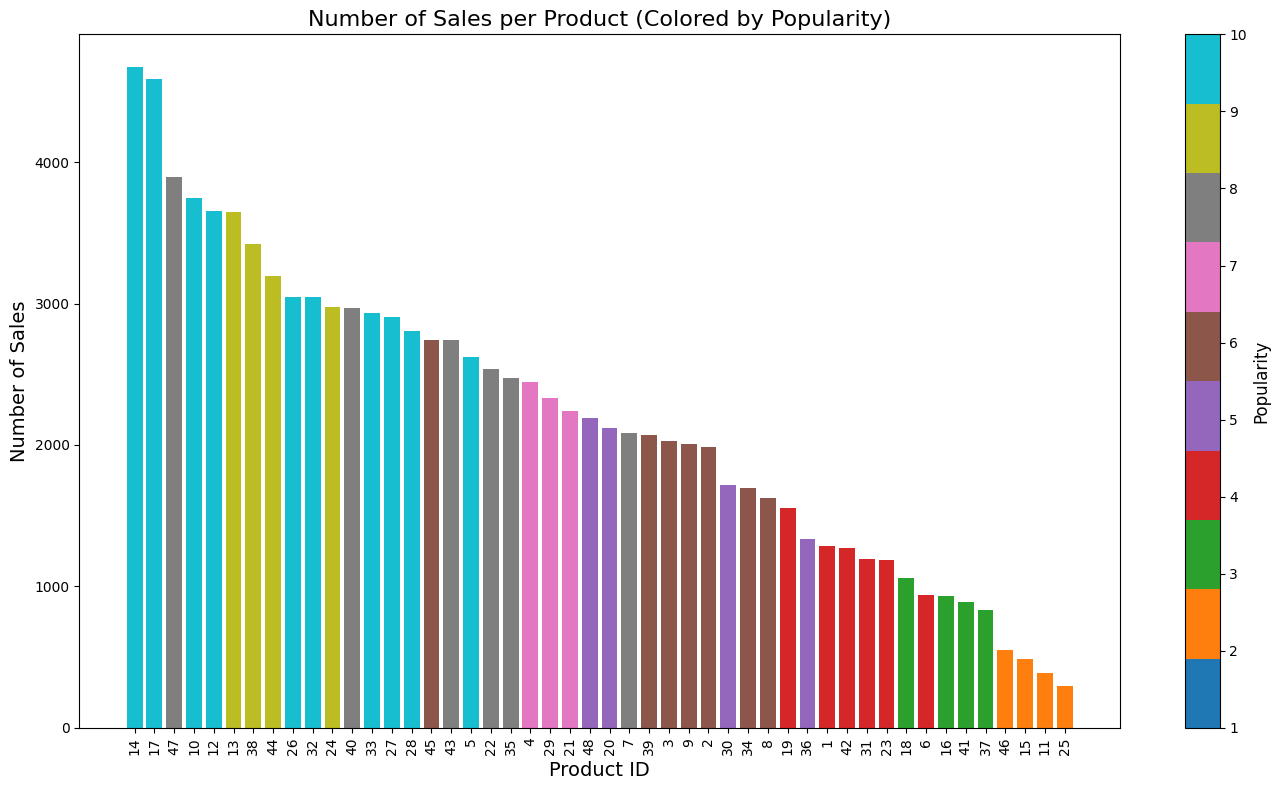

In [55]:
# Merge sales_df with products_df to get popularity
sales_with_popularity = sales_df.merge(products_df[["ProductID", "Popularity"]], on="ProductID", how="left")

# Group by ProductID to count the number of sales
product_sales = sales_with_popularity.groupby("ProductID").size().reset_index(name="NumberOfSales")

# Merge with products_df to get popularity
product_sales = product_sales.merge(products_df[["ProductID", "Popularity"]], on="ProductID", how="left")

# Sort by NumberOfSales for better visualization
product_sales = product_sales.sort_values(by="NumberOfSales", ascending=False)


# Plot
plt.figure(figsize=(14, 8))
bars = plt.bar(
    product_sales["ProductID"].astype(str),  # Convert ProductID to string for better labeling
    product_sales["NumberOfSales"],
    color=plt.cm.tab10(product_sales["Popularity"]),  # Use tab10 colormap for popularity
)

# Add colorbar for popularity
sm = plt.cm.ScalarMappable(cmap=plt.cm.tab10, norm=plt.Normalize(vmin=product_sales["Popularity"].min(), vmax=product_sales["Popularity"].max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label("Popularity", fontsize=12)

# Labels and title
plt.title("Number of Sales per Product (Colored by Popularity)", fontsize=16)
plt.xlabel("Product ID", fontsize=14)
plt.ylabel("Number of Sales", fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show plot
plt.show()

<ipython-input-57-bb43062ee75a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_per_region, x="Region", y="SalesAmount", palette="viridis")


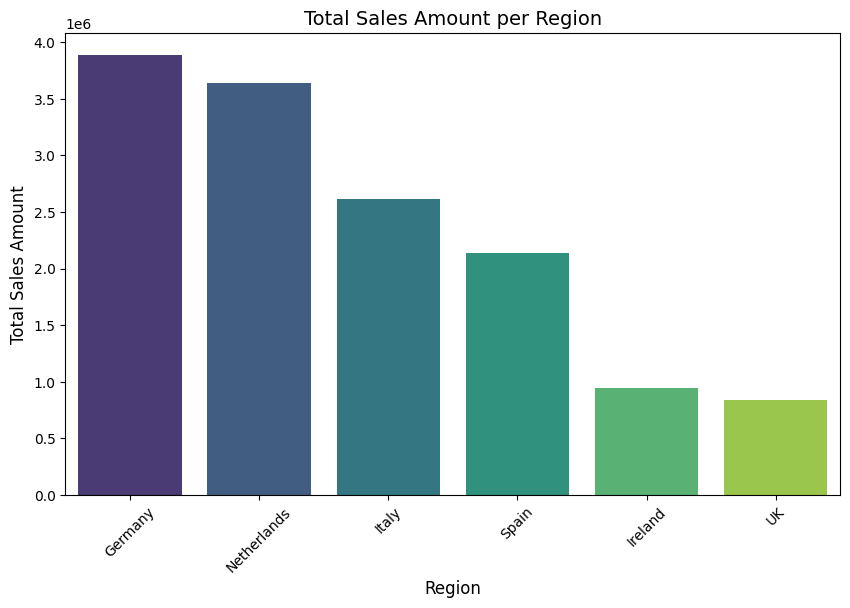

In [57]:
# Group sales by region
sales_per_region = sales_df.groupby('Region', as_index=False)['SalesAmount'].sum()

# Sort values for better visualization
sales_per_region = sales_per_region.sort_values(by="SalesAmount", ascending=False)

# Set plot style
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_per_region, x="Region", y="SalesAmount", palette="viridis")

# Add labels and title
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Sales Amount", fontsize=12)
plt.title("Total Sales Amount per Region", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Show the plot
plt.show()

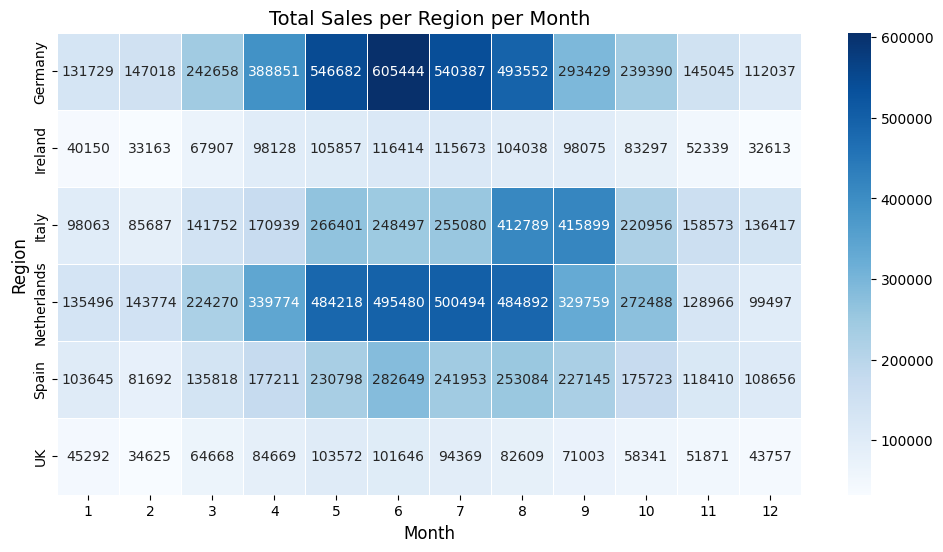

In [58]:
# Ensure 'Date' is in datetime format
sales_df["SalesDate"] = pd.to_datetime(sales_df["SalesDate"])

# Extract year-month for grouping
sales_df["Month"] = sales_df["SalesDate"].dt.month

# Pivot table for heatmap
sales_pivot = sales_df.pivot_table(values="SalesAmount", index="Region", columns="Month", aggfunc="sum")

# Create heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(sales_pivot, cmap="Blues", annot=True, fmt=".0f", linewidths=0.5)

# Titles and labels
plt.title("Total Sales per Region per Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Region", fontsize=12)

# Show plot
plt.show()

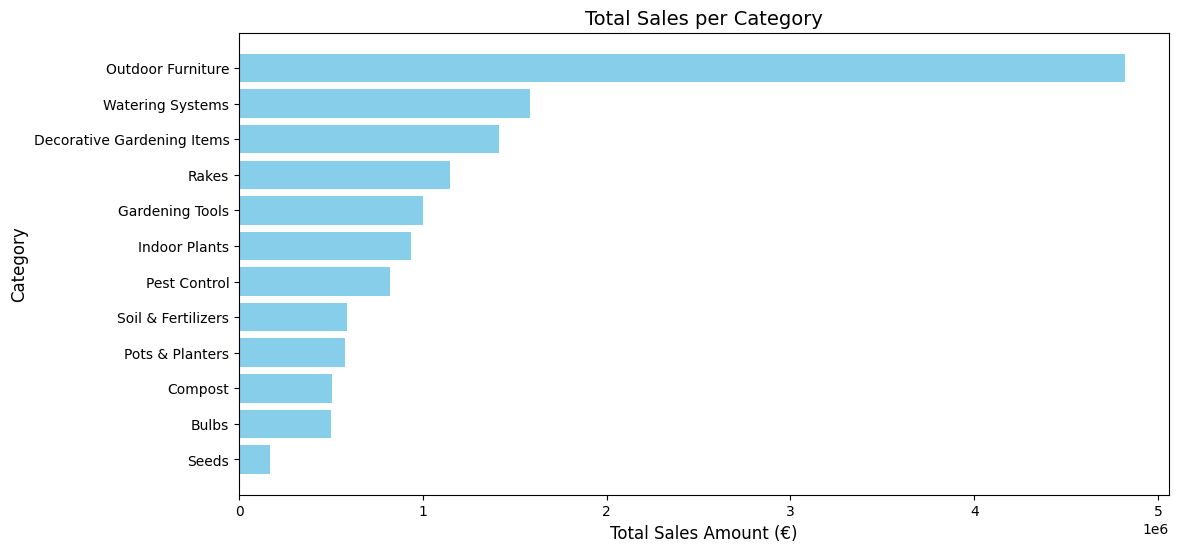

In [59]:
# Merge sales_df with products_df to get category information
sales_with_category = sales_df.merge(products_df[["ProductID", "Category"]], on="ProductID", how="left")

# Group by category and sum sales amount
category_sales = sales_with_category.groupby("Category")["SalesAmount"].sum().reset_index()

# Sort categories by total sales
category_sales = category_sales.sort_values(by="SalesAmount", ascending=False)

# Plot
plt.figure(figsize=(12, 6))
plt.barh(category_sales["Category"], category_sales["SalesAmount"], color="skyblue")

# Labels and title
plt.xlabel("Total Sales Amount (€)", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.title("Total Sales per Category", fontsize=14)
plt.gca().invert_yaxis()  # Invert for better readability

# Show plot
plt.show()

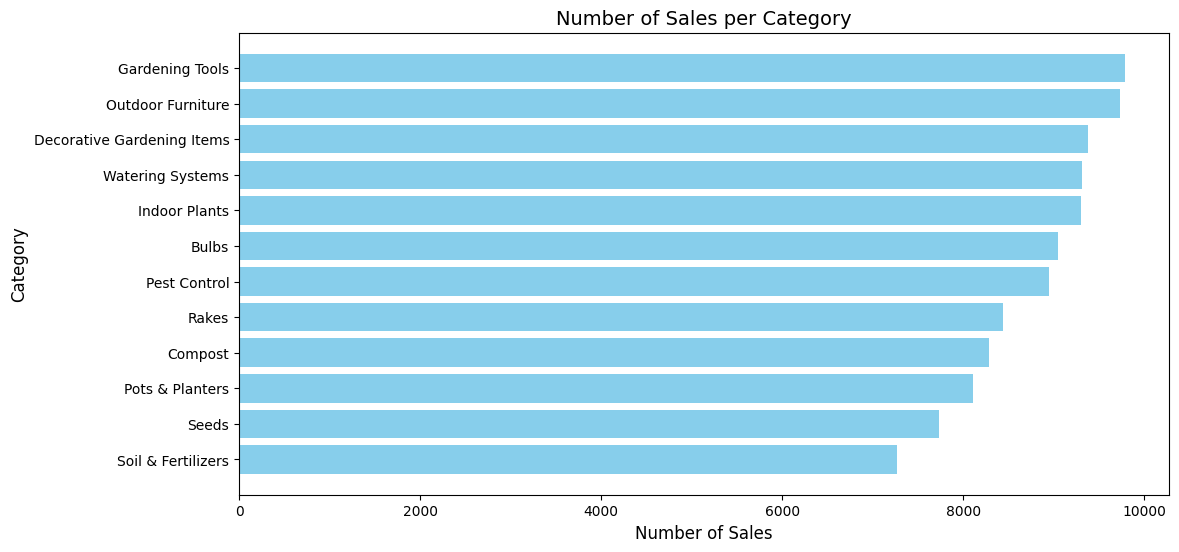

In [60]:
# Merge sales_df with products_df to get category information
sales_with_category = sales_df.merge(products_df[["ProductID", "Category"]], on="ProductID", how="left")

# Group by category and count the number of sales (SaleID)
category_sales_count = sales_with_category.groupby("Category")["SaleID"].nunique().reset_index()

# Rename the column for clarity
category_sales_count = category_sales_count.rename(columns={"SaleID": "NumberOfSales"})

# Sort categories by number of sales
category_sales_count = category_sales_count.sort_values(by="NumberOfSales", ascending=False)

# Plot
plt.figure(figsize=(12, 6))
plt.barh(category_sales_count["Category"], category_sales_count["NumberOfSales"], color="skyblue")

# Labels and title
plt.xlabel("Number of Sales", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.title("Number of Sales per Category", fontsize=14)
plt.gca().invert_yaxis()  # Invert for better readability

# Show plot
plt.show()

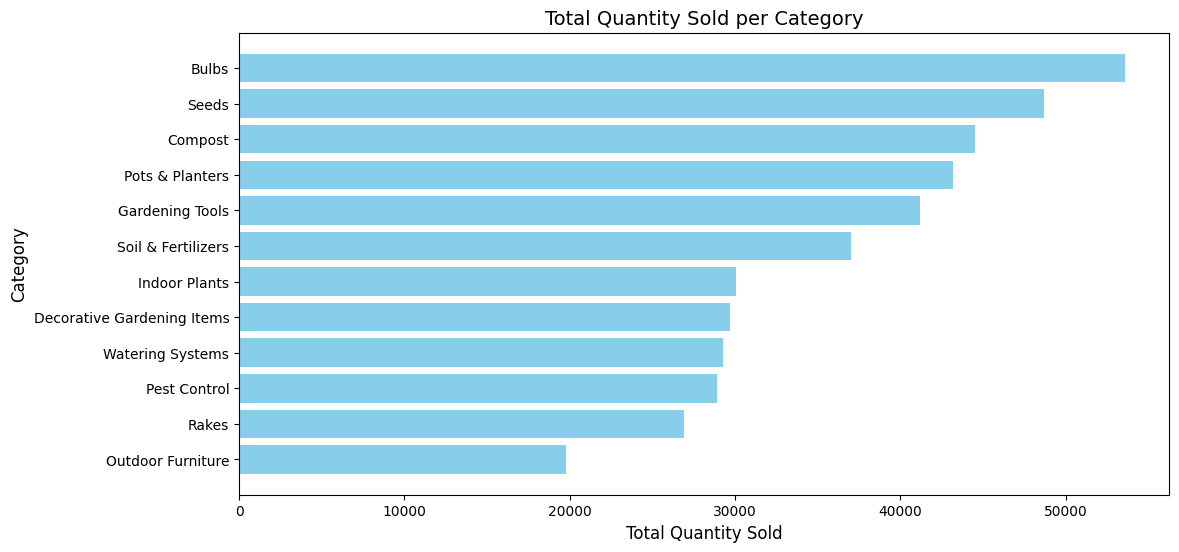

In [61]:
# Merge sales_df with products_df to get category information
sales_with_category = sales_df.merge(products_df[["ProductID", "Category"]], on="ProductID", how="left")

# Group by category and sum the quantities sold
category_quantity_sold = sales_with_category.groupby("Category")["Quantity"].sum().reset_index()

# Rename the column for clarity
category_quantity_sold = category_quantity_sold.rename(columns={"Quantity": "TotalQuantitySold"})

# Sort categories by total quantity sold
category_quantity_sold = category_quantity_sold.sort_values(by="TotalQuantitySold", ascending=False)

# Plot
plt.figure(figsize=(12, 6))
plt.barh(category_quantity_sold["Category"], category_quantity_sold["TotalQuantitySold"], color="skyblue")

# Labels and title
plt.xlabel("Total Quantity Sold", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.title("Total Quantity Sold per Category", fontsize=14)
plt.gca().invert_yaxis()  # Invert for better readability

# Show plot
plt.show()

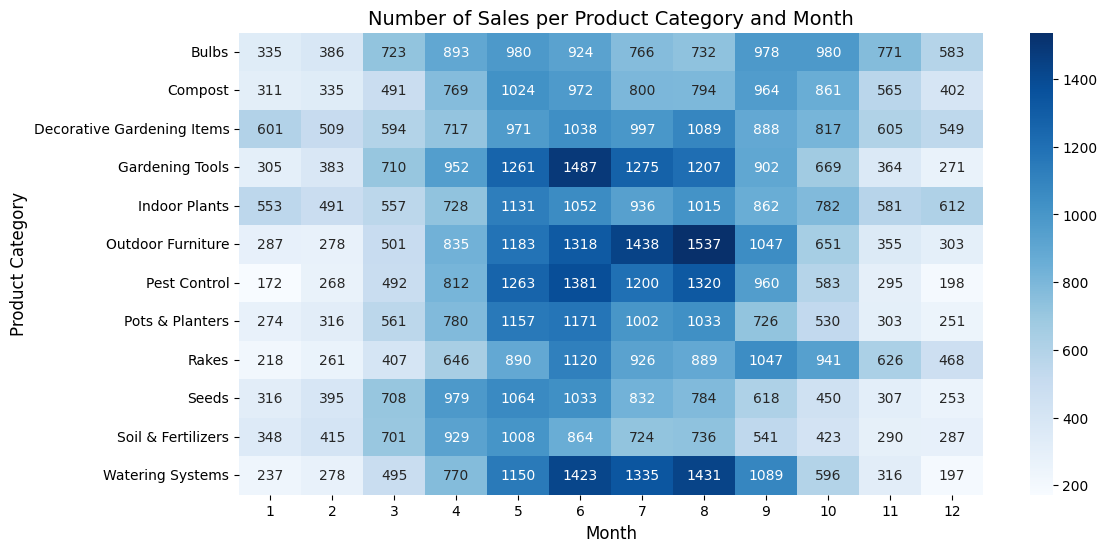

In [62]:
# Convert 'Date' to datetime format if not already
sales_df['SalesDate'] = pd.to_datetime(sales_df['SalesDate'])

# Extract the month from the sales date
sales_df['Month'] = sales_df['SalesDate'].dt.month

# Merge sales data with product data to get product categories
sales_with_category = sales_df.merge(products_df[['ProductID', 'Category']], on='ProductID')

# Aggregate the number of sales per category and month
sales_summary = sales_with_category.groupby(['Category', 'Month']).size().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(sales_summary, cmap='Blues', annot=True, fmt='d')

# Titles and labels
plt.title("Number of Sales per Product Category and Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Product Category", fontsize=12)

# Show plot
plt.show()

<ipython-input-65-57a69a340396>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_category_sales = sales_with_age.groupby(["AgeGroup", "Category"]).size().reset_index(name="NumberOfSales")


<Figure size 1200x800 with 0 Axes>

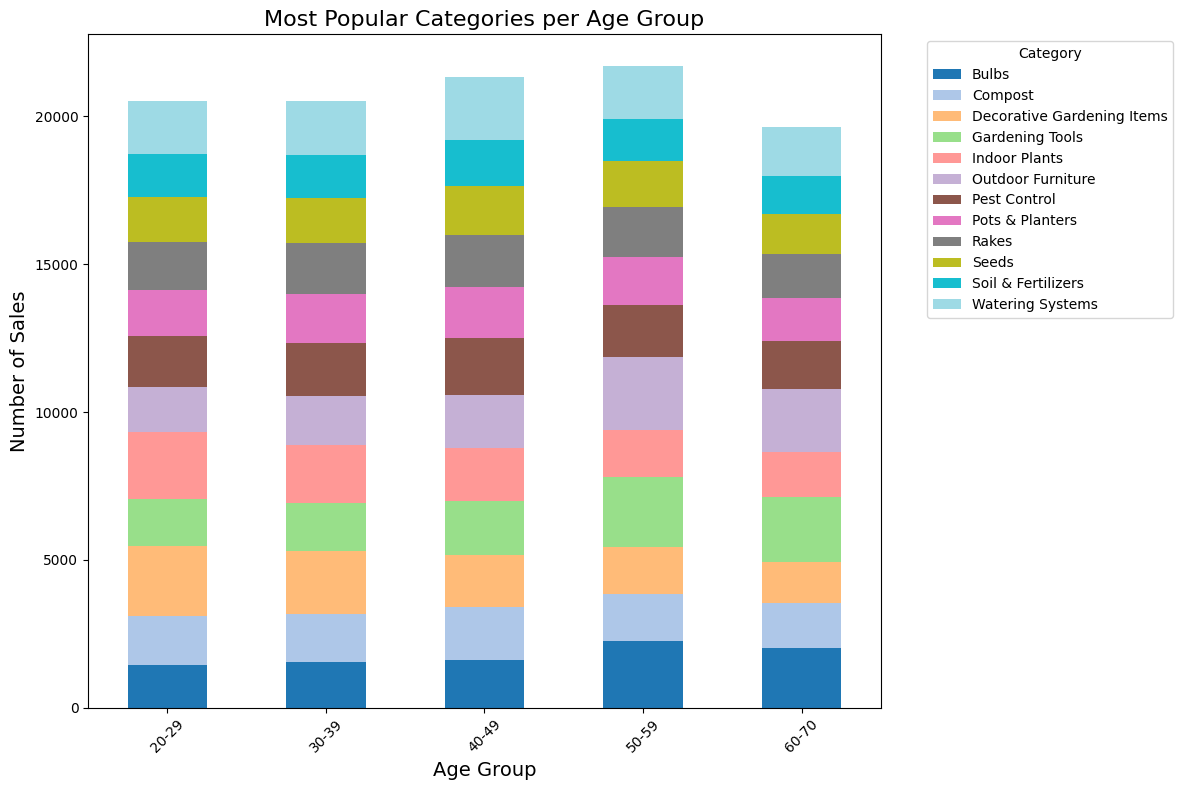

In [65]:
# Merge sales_df with products_df to get category information
sales_with_category = sales_df.merge(products_df[["ProductID", "Category"]], on="ProductID", how="left")

# Merge sales_with_category with customers to get age information
sales_with_age = sales_with_category.merge(customers[["CustomerID", "Age"]], on="CustomerID", how="left")

# Create age groups
bins = [20, 30, 40, 50, 60, 70]
labels = ["20-29", "30-39", "40-49", "50-59", "60-70"]
sales_with_age["AgeGroup"] = pd.cut(sales_with_age["Age"], bins=bins, labels=labels, right=False)

# Group by AgeGroup and Category, then count the number of sales
age_category_sales = sales_with_age.groupby(["AgeGroup", "Category"]).size().reset_index(name="NumberOfSales")

# Pivot the data for visualization
age_category_pivot = age_category_sales.pivot(index="AgeGroup", columns="Category", values="NumberOfSales")

# Plot
plt.figure(figsize=(12, 8))
age_category_pivot.plot(kind="bar", stacked=True, colormap="tab20", figsize=(12, 8))
plt.title("Most Popular Categories per Age Group", fontsize=16)
plt.xlabel("Age Group", fontsize=14)
plt.ylabel("Number of Sales", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

<ipython-input-66-34829ce5fa35>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_category_sales = sales_with_age.groupby(["AgeGroup", "Category"]).size().reset_index(name="NumberOfSales")
<ipython-input-66-34829ce5fa35>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_categories_per_age = age_category_sales.groupby("AgeGroup").apply(
<ipython-input-66-34829ce5fa35>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to e

<Figure size 1200x800 with 0 Axes>

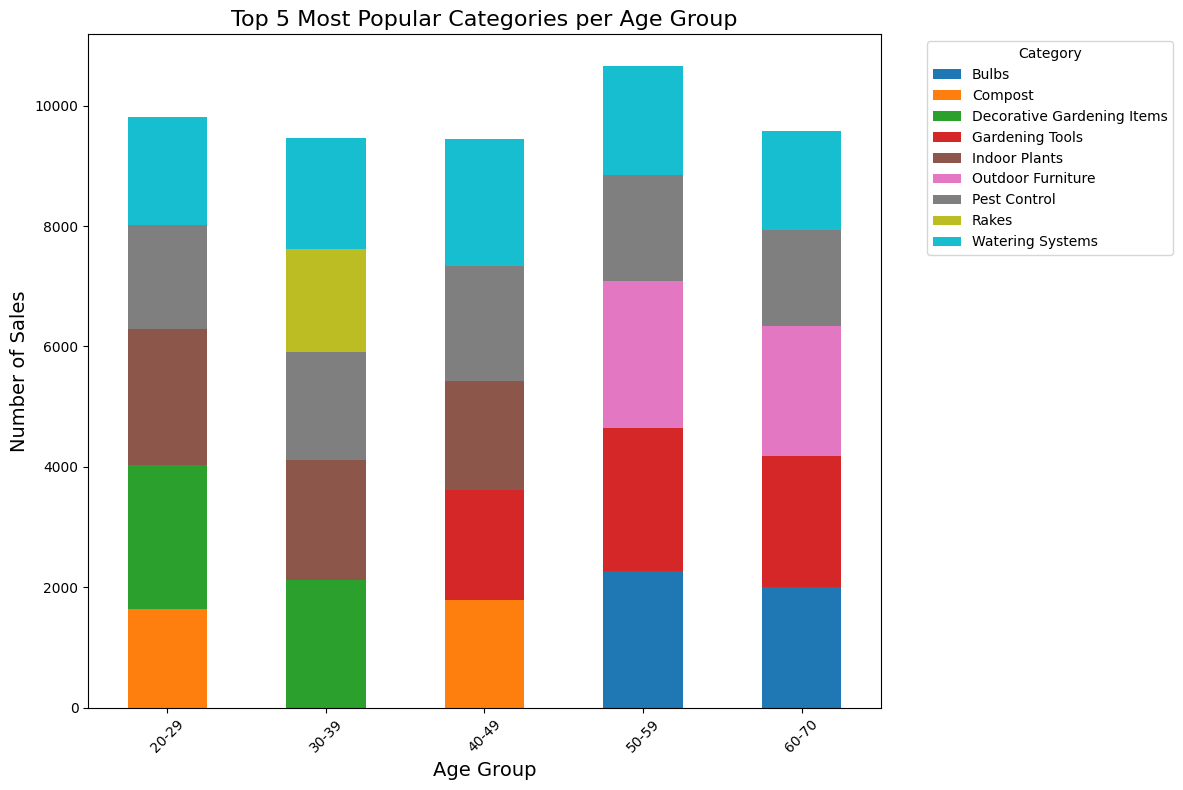

In [66]:
# Group by AgeGroup and Category, then count the number of sales
age_category_sales = sales_with_age.groupby(["AgeGroup", "Category"]).size().reset_index(name="NumberOfSales")

# Get the top 5 categories for each age group
top_categories_per_age = age_category_sales.groupby("AgeGroup").apply(
    lambda x: x.nlargest(5, "NumberOfSales")
).reset_index(drop=True)

# Pivot the data for visualization
age_category_pivot = top_categories_per_age.pivot(index="AgeGroup", columns="Category", values="NumberOfSales")

# Plot
plt.figure(figsize=(12, 8))
age_category_pivot.plot(kind="bar", stacked=True, colormap="tab10", figsize=(12, 8))
plt.title("Top 5 Most Popular Categories per Age Group", fontsize=16)
plt.xlabel("Age Group", fontsize=14)
plt.ylabel("Number of Sales", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

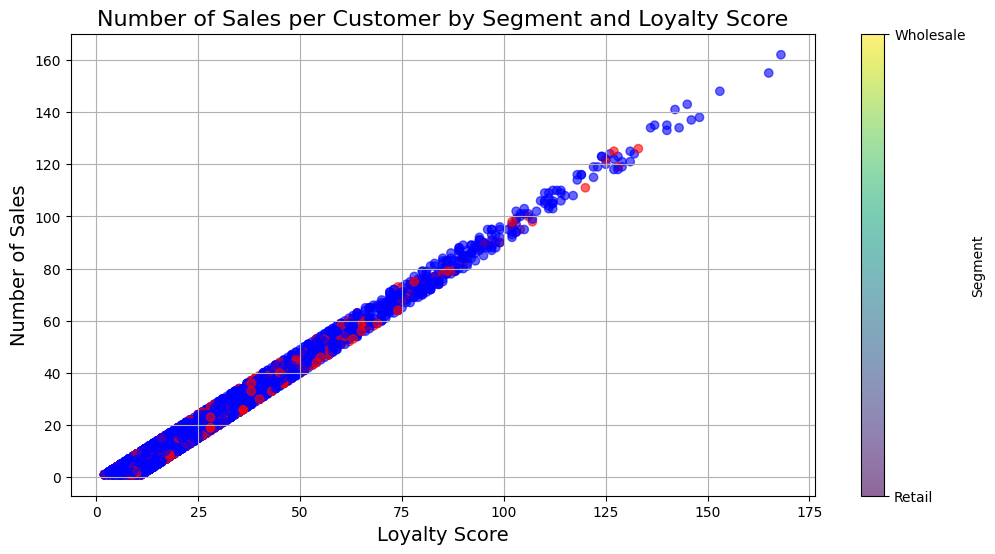

In [67]:
# Group by CustomerID to count the number of sales
customer_sales_count = sales_df.groupby("CustomerID").size().reset_index(name="NumberOfSales")

# Merge with customers table to get segment and loyalty score
customer_sales_with_info = customer_sales_count.merge(
    customers[["CustomerID", "Segment", "LoyaltyScore"]], on="CustomerID", how="left"
)

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(
    customer_sales_with_info["LoyaltyScore"],
    customer_sales_with_info["NumberOfSales"],
    c=customer_sales_with_info["Segment"].map({"Retail": "blue", "Wholesale": "red"}),
    alpha=0.6,
)
plt.title("Number of Sales per Customer by Segment and Loyalty Score", fontsize=16)
plt.xlabel("Loyalty Score", fontsize=14)
plt.ylabel("Number of Sales", fontsize=14)
plt.colorbar(ticks=[0, 1], label="Segment").set_ticklabels(["Retail", "Wholesale"])
plt.grid(True)
plt.show()

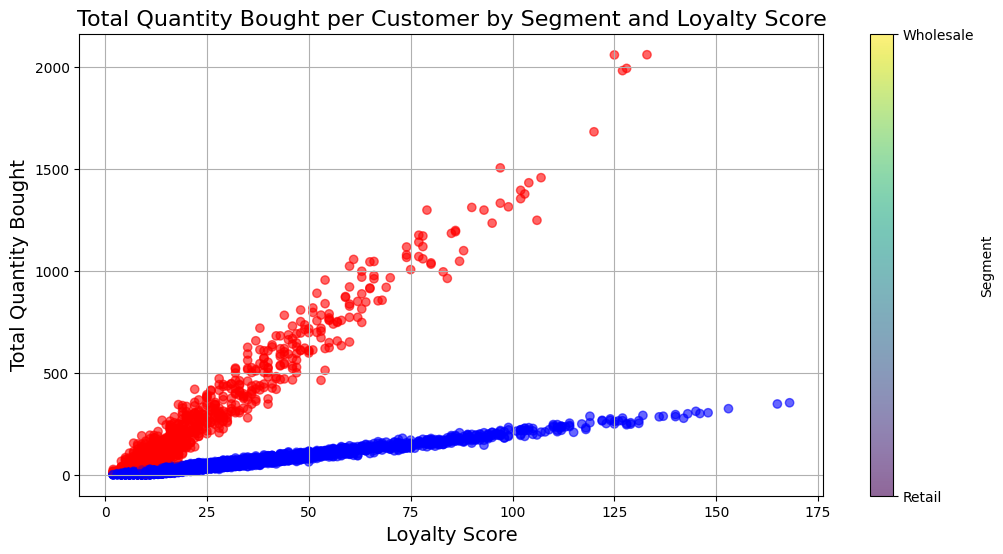

In [68]:
# Group by CustomerID to sum the quantity bought
customer_quantity_sum = sales_df.groupby("CustomerID")["Quantity"].sum().reset_index(name="TotalQuantity")

# Merge with customers table to get segment and loyalty score
customer_quantity_with_info = customer_quantity_sum.merge(
    customers[["CustomerID", "Segment", "LoyaltyScore"]], on="CustomerID", how="left"
)

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(
    customer_quantity_with_info["LoyaltyScore"],
    customer_quantity_with_info["TotalQuantity"],
    c=customer_quantity_with_info["Segment"].map({"Retail": "blue", "Wholesale": "red"}),
    alpha=0.6,
)
plt.title("Total Quantity Bought per Customer by Segment and Loyalty Score", fontsize=16)
plt.xlabel("Loyalty Score", fontsize=14)
plt.ylabel("Total Quantity Bought", fontsize=14)
plt.colorbar(ticks=[0, 1], label="Segment").set_ticklabels(["Retail", "Wholesale"])
plt.grid(True)
plt.show()

In [69]:
print(returns_df.head())
print(returns_df.info())
print(returns_df.describe())

   ReturnID  SaleID  ReturnDate                     Reason
0        12   89947  2024-11-05  Did not meet expectations
1        16   15521  2024-05-01                  Defective
2        26   28103  2024-06-04              Late Delivery
3        31   58195  2024-07-23      Customer Changed Mind
4        32   39532  2024-06-18                  Defective
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4859 entries, 0 to 4858
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ReturnID    4859 non-null   int64 
 1   SaleID      4859 non-null   int64 
 2   ReturnDate  4859 non-null   object
 3   Reason      4859 non-null   object
dtypes: int64(2), object(2)
memory usage: 152.0+ KB
None
           ReturnID         SaleID
count   4859.000000    4859.000000
mean   24770.678329   51341.108870
std    14474.070099   29672.772636
min       12.000000      27.000000
25%    12180.500000   25939.000000
50%    24698.000000   51441.00000

<Figure size 1200x800 with 0 Axes>

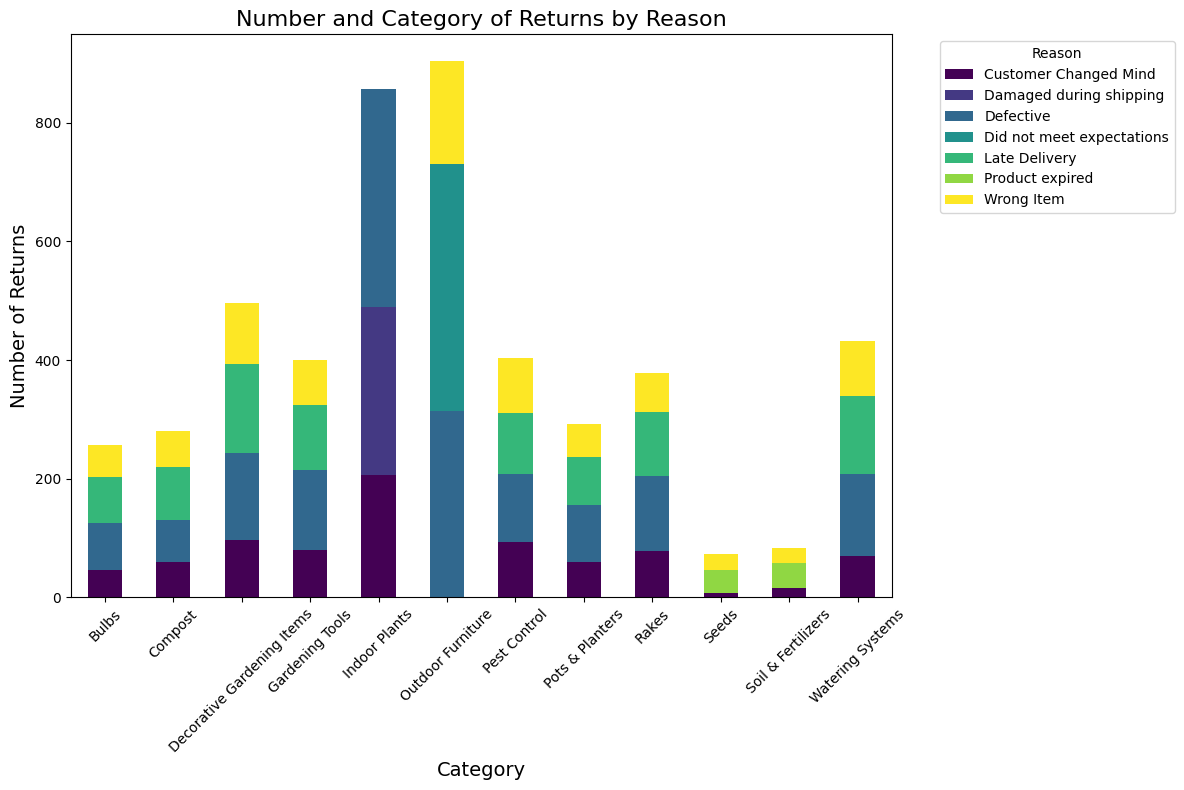

In [70]:
# Convert returns list to a DataFrame
returns_df = pd.DataFrame(returns, columns=["ReturnID", "SaleID", "ReturnDate", "Reason"])

# Merge returns_df with sales_df to get ProductID
returns_with_product_id = returns_df.merge(sales_df[['SaleID', 'ProductID']], on='SaleID', how='left')

# Merge returns_with_product_id with products_df to get category information
returns_with_category = returns_with_product_id.merge(products_df[['ProductID', 'Category']], on='ProductID', how='left')

# Group by Category and Reason to count the number of returns
category_reason_returns = returns_with_category.groupby(["Category", "Reason"]).size().reset_index(name="NumberOfReturns")

# Pivot the data for visualization
pivot_table = category_reason_returns.pivot(index="Category", columns="Reason", values="NumberOfReturns")

# Fill NaN values with 0 (in case some categories don't have returns for certain reasons)
pivot_table = pivot_table.fillna(0)

# Ensure all values are numeric
pivot_table = pivot_table.apply(pd.to_numeric, errors="coerce")

# Plot
plt.figure(figsize=(12, 8))
pivot_table.plot(kind="bar", stacked=True, colormap="viridis", figsize=(12, 8))

# Labels and title
plt.title("Number and Category of Returns by Reason", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Number of Returns", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Reason", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Show plot
plt.show()

In [71]:
print(inventory_df.head())
print(inventory_df.info())
print(inventory_df.describe())

   ProductID  StockLevel  ReorderPoint
0          1        84.2            43
1          2       101.0            18
2          3        63.0            44
3          4        93.8            38
4          5       107.1            29
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ProductID     48 non-null     int64  
 1   StockLevel    48 non-null     float64
 2   ReorderPoint  48 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 KB
None
       ProductID  StockLevel  ReorderPoint
count      48.00   48.000000     48.000000
mean       24.50  103.708333     28.270833
std        14.00   47.622473     11.674193
min         1.00   19.800000     10.000000
25%        12.75   66.175000     18.000000
50%        24.50   95.750000     28.500000
75%        36.25  136.925000     37.250000
max        48.00  216.900000     49.000000


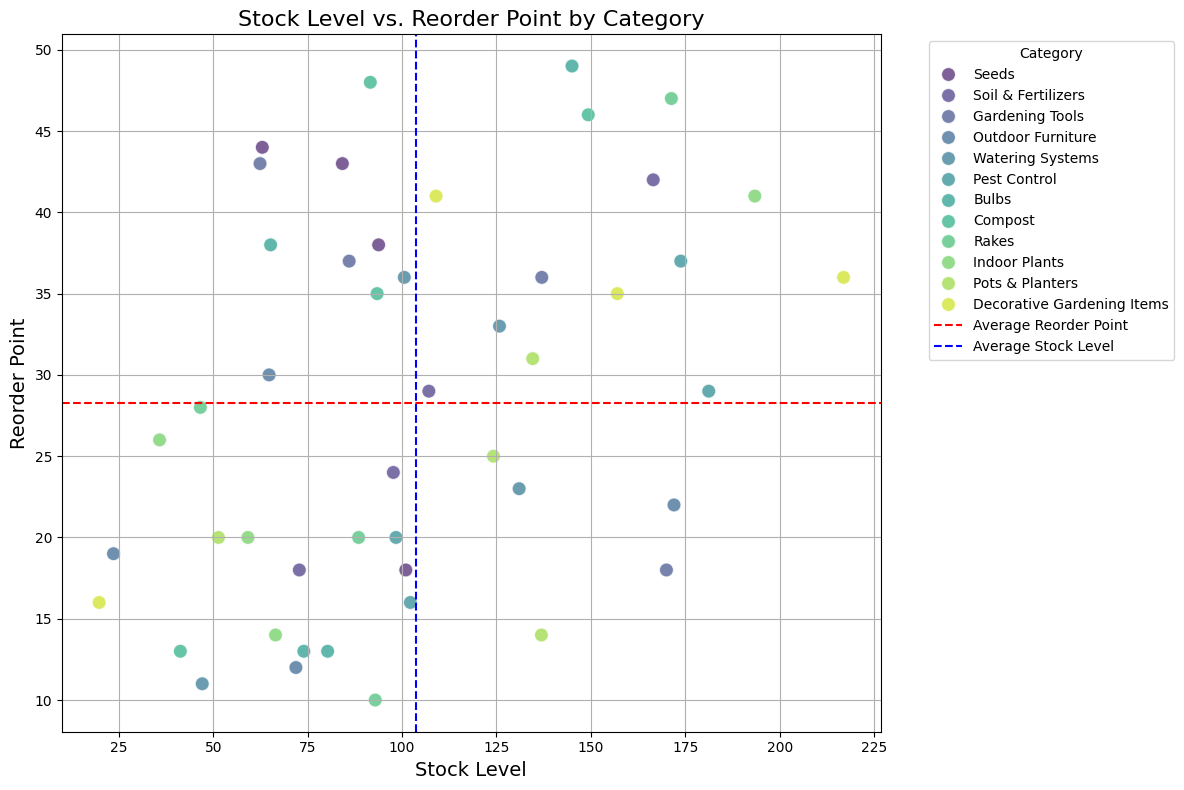

In [72]:
# Merge inventory_df with products_df to get category information
inventory_with_category = inventory_df.merge(products_df[["ProductID", "Category"]], on="ProductID", how="left")

# Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=inventory_with_category,
    x="StockLevel",
    y="ReorderPoint",
    hue="Category",
    palette="viridis",
    s=100,
    alpha=0.7,
)
plt.title("Stock Level vs. Reorder Point by Category", fontsize=16)
plt.xlabel("Stock Level", fontsize=14)
plt.ylabel("Reorder Point", fontsize=14)
plt.axhline(y=inventory_with_category["ReorderPoint"].mean(), color="red", linestyle="--", label="Average Reorder Point")
plt.axvline(x=inventory_with_category["StockLevel"].mean(), color="blue", linestyle="--", label="Average Stock Level")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-73-6d30b3412926>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


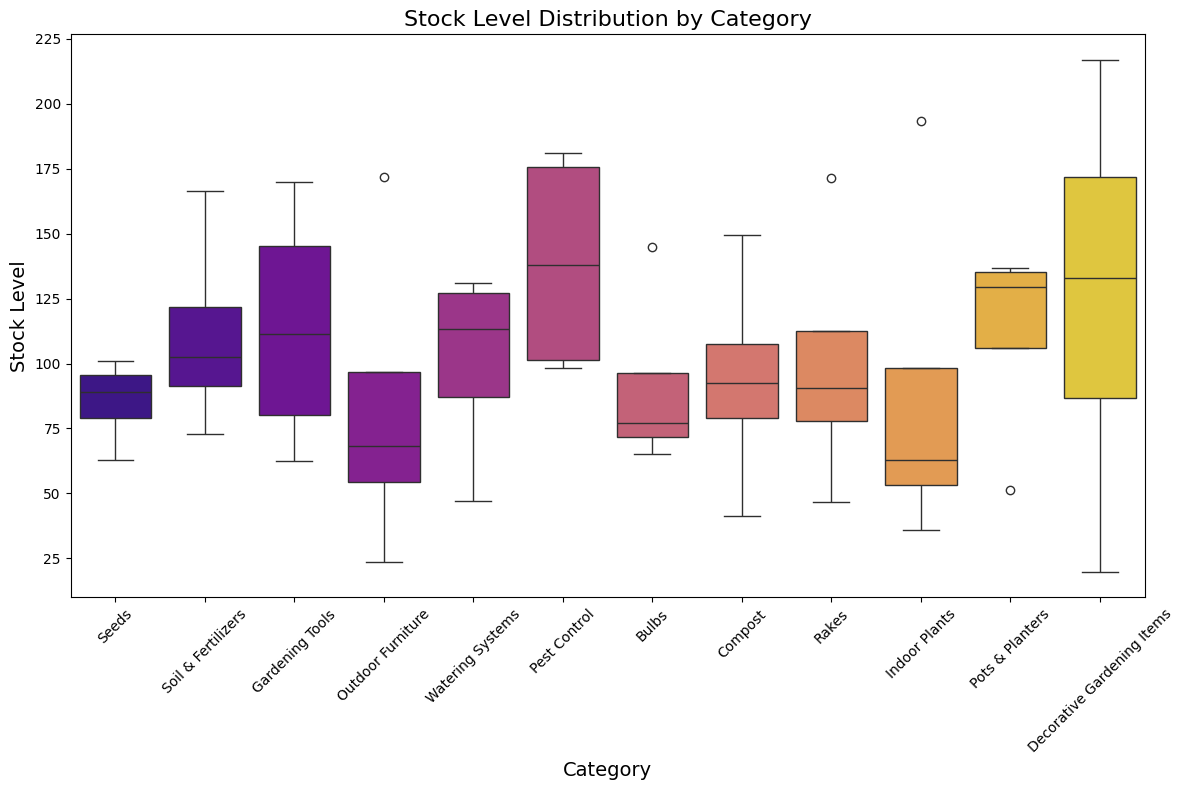

In [73]:
plt.figure(figsize=(12, 8))
sns.boxplot(
    data=inventory_with_category,
    x="Category",
    y="StockLevel",
    palette="plasma",
)
plt.title("Stock Level Distribution by Category", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Stock Level", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [74]:
print(not_realized_purchases_df.describe)
print(not_realized_purchases_df.info())
print(not_realized_purchases_df.describe())

<bound method NDFrame.describe of       SaleID   SalesDate  ProductID  CustomerID       Region  SalesAmount  \
0        102  2024-01-01          7        3956  Netherlands       517.24   
1        158  2024-01-02          7         713        Italy       549.98   
2        221  2024-01-02         10        2697  Netherlands        49.84   
3        625  2024-01-06         32        4692        Italy       359.70   
4        785  2024-01-07          2        4409        Italy        78.96   
...      ...         ...        ...         ...          ...          ...   
4802  105061  2024-12-29         27        2832  Netherlands        17.90   
4803  105061  2024-12-29         28        2370  Netherlands        46.35   
4804  105074  2024-12-29         27        1699      Ireland         8.95   
4805  105131  2024-12-30          7        3897      Germany       348.91   
4806  105336  2024-12-31         26        3013      Ireland       397.29   

      Price  DiscountRate  DiscountAmount